In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dados = pd.read_csv('electric_vehicles_spec_2025-V1.csv')
dados.head()

,brand,model,top_speed_kmh,battery_capacity_kWh,battery_type,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,...,towing_capacity_kg,cargo_volume_l,seats,drivetrain,segment,length_mm,width_mm,height_mm,car_body_type,source_url
0,Abarth,500e Convertible,155,37.8,Lithium-ion,192.0,235.0,156,225,7.0,...,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1904/Abarth-500e-C...
1,Abarth,500e Hatchback,155,37.8,Lithium-ion,192.0,235.0,149,225,7.0,...,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1903/Abarth-500e-H...
2,Abarth,600e Scorpionissima,200,50.8,Lithium-ion,102.0,345.0,158,280,5.9,...,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3057/Abarth-600e-S...
3,Abarth,600e Turismo,200,50.8,Lithium-ion,102.0,345.0,158,280,6.2,...,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3056/Abarth-600e-T...
4,Aiways,U5,150,60.0,Lithium-ion,0.0,310.0,156,315,7.5,...,0.0,496,5,FWD,JC - Medium,4680,1865,1700,SUV,https://ev-database.org/car/1678/Aiways-U5


# Perguntas para Análise Exploratória (EDA)

In [3]:
# Quais marcas oferecem mais modelos de veículos elétricos?
modelos_por_marca = dados['brand'].value_counts()
modelos_por_marca.head(10)

brand
Mercedes-Benz    41
Audi             27
Porsche          26
Volkswagen       23
Ford             22
BMW              20
Peugeot          19
Volvo            18
Smart            17
BYD              17
Name: count, dtype: int64

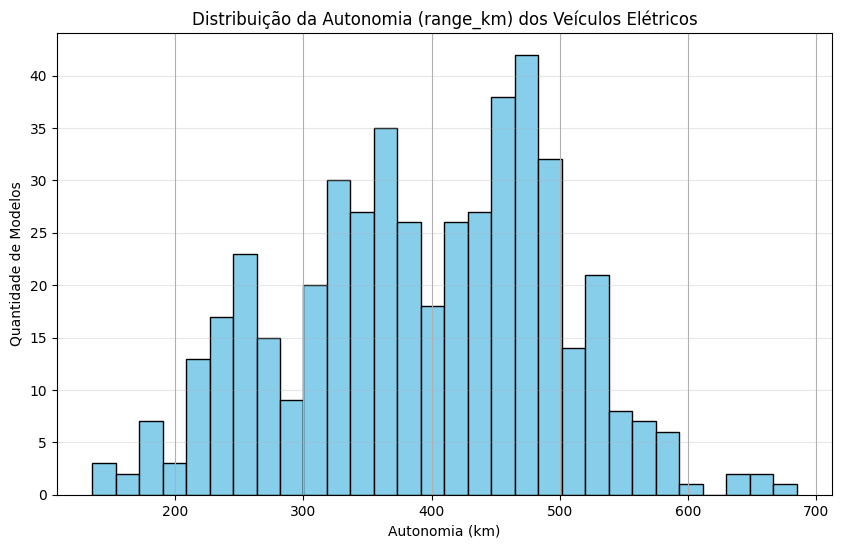

In [4]:
# Qual é a distribuição da autonomia (range_km) entre os veículos?
plt.figure(figsize=(10,6))
dados['range_km'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title('Distribuição da Autonomia (range_km) dos Veículos Elétricos')
plt.xlabel('Autonomia (km)')
plt.ylabel('Quantidade de Modelos')
plt.grid(axis='y', alpha=0.3)
plt.show()

In [5]:
# Quais são os veículos com maior e menor autonomia?
veiculo_maior_autonomia = dados.loc[dados['range_km'].idxmax()]
veiculo_menor_autonomia = dados.loc[dados['range_km'].idxmin()]

print("Veículo com MAIOR autonomia:")
print(veiculo_maior_autonomia[['brand', 'model', 'range_km']])
print("\nVeículo com MENOR autonomia:")
print(veiculo_menor_autonomia[['brand', 'model', 'range_km']])

Veículo com MAIOR autonomia:
brand       Mercedes-Benz
model            EQS 450+
range_km              685
Name: 237, dtype: object

Veículo com MENOR autonomia:
brand                  Fiat
model       500e 3+1 24 kWh
range_km                135
Name: 102, dtype: object


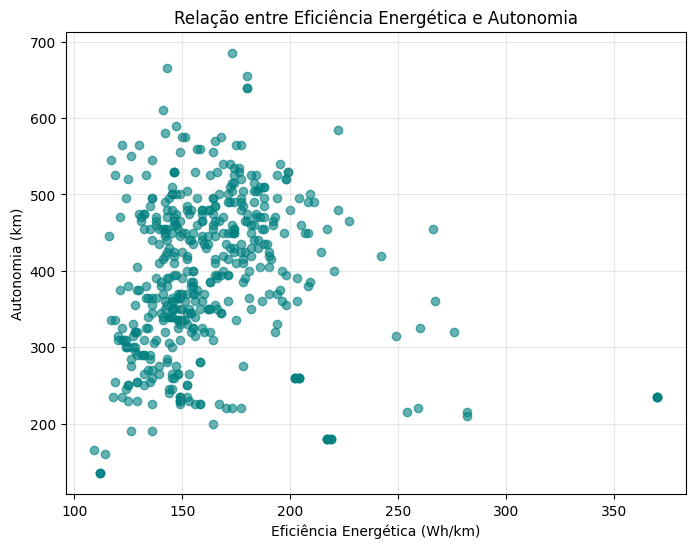

In [6]:
# Qual a relação entre eficiência energética (efficiency_wh_per_km) e autonomia?
plt.figure(figsize=(8,6))
plt.scatter(dados['efficiency_wh_per_km'], dados['range_km'], alpha=0.6, color='teal')
plt.xlabel('Eficiência Energética (Wh/km)')
plt.ylabel('Autonomia (km)')
plt.title('Relação entre Eficiência Energética e Autonomia')
plt.grid(alpha=0.3)
plt.show()

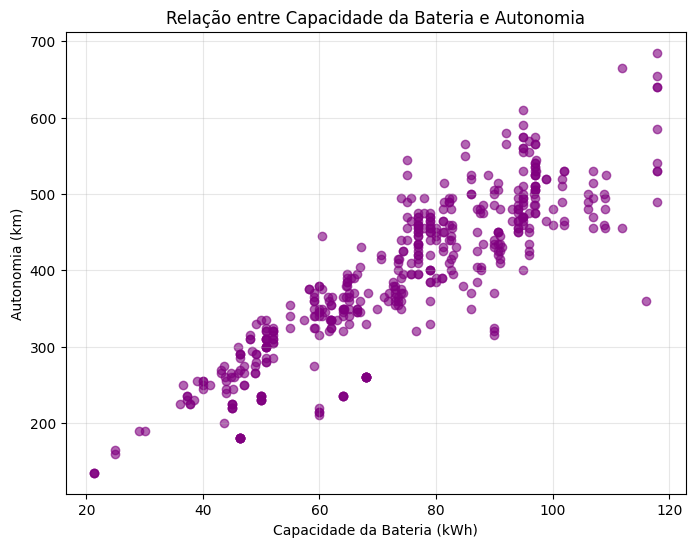

In [7]:
# Veículos com mais bateria (battery_capacity_kWh) têm sempre mais autonomia?
plt.figure(figsize=(8,6))
plt.scatter(dados['battery_capacity_kWh'], dados['range_km'], alpha=0.6, color='purple')
plt.xlabel('Capacidade da Bateria (kWh)')
plt.ylabel('Autonomia (km)')
plt.title('Relação entre Capacidade da Bateria e Autonomia')
plt.grid(alpha=0.3)
plt.show()

<Figure size 800x600 with 0 Axes>

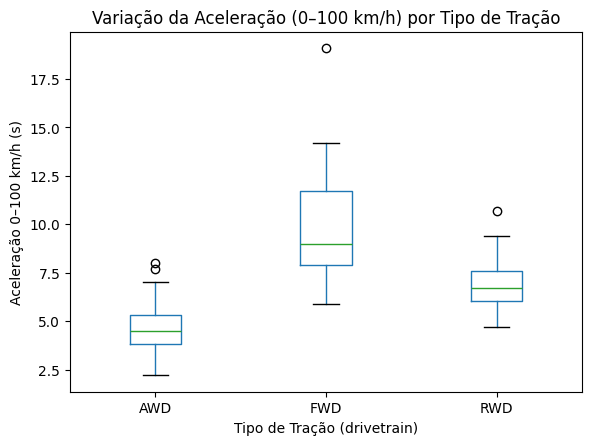

In [8]:
# Como a aceleração (0–100 km/h) varia entre os diferentes tipos de tração (drivetrain)?
plt.figure(figsize=(8,6))
dados.boxplot(column='acceleration_0_100_s', by='drivetrain', grid=False)
plt.title('Variação da Aceleração (0–100 km/h) por Tipo de Tração')
plt.suptitle('')
plt.xlabel('Tipo de Tração (drivetrain)')
plt.ylabel('Aceleração 0–100 km/h (s)')
plt.show()

Média de eficiência dos SUVs: 161.28 Wh/km
Média de eficiência dos Compactos: 136.92 Wh/km
----------


C:\Users\João\AppData\Local\Temp\ipykernel_4308\3837528603.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([suvs['efficiency_wh_per_km'], compactos['efficiency_wh_per_km']], labels=['SUV', 'Compacto'])


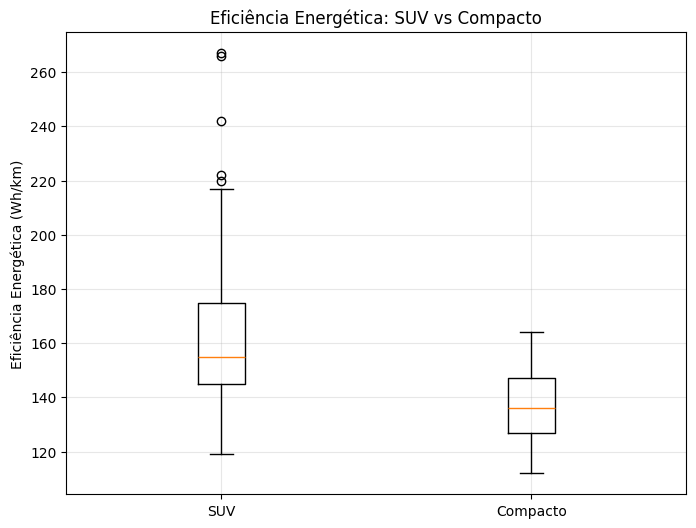

In [9]:
# SUVs realmente são menos eficientes do que carros compactos? (Considerando eficiência como 'efficiency_wh_per_km')

# Filtrar SUVs e carros compactos
suvs = dados[dados['car_body_type'].str.contains('SUV', case=False, na=False)]
compactos = dados[dados['segment'].str.contains('B - Compact', case=False, na=False)]

media_eficiencia_suv = suvs['efficiency_wh_per_km'].mean()
media_eficiencia_compactos = compactos['efficiency_wh_per_km'].mean()

print(f"Média de eficiência dos SUVs: {media_eficiencia_suv:.2f} Wh/km")
print(f"Média de eficiência dos Compactos: {media_eficiencia_compactos:.2f} Wh/km")
print("----------")

plt.figure(figsize=(8,6))
plt.boxplot([suvs['efficiency_wh_per_km'], compactos['efficiency_wh_per_km']], labels=['SUV', 'Compacto'])
plt.ylabel('Eficiência Energética (Wh/km)')
plt.title('Eficiência Energética: SUV vs Compacto')
plt.grid(alpha=0.3)
plt.show()

In [10]:
# Qual a média de velocidade máxima por tipo de carroceria (car_body_type)?
media_velocidade_por_carroceria = dados.groupby('car_body_type')['top_speed_kmh'].mean().sort_values(ascending=False)
print("Média de Velocidade Máxima por Tipo de Carroceria:")
print(media_velocidade_por_carroceria)

Média de Velocidade Máxima por Tipo de Carroceria:
car_body_type
Coupe                  287.500000
Sedan                  215.920635
Station/Estate         215.851852
Liftback Sedan         203.424242
Cabriolet              194.000000
SUV                    186.173554
Hatchback              156.614035
Small Passenger Van    138.978261
Name: top_speed_kmh, dtype: float64


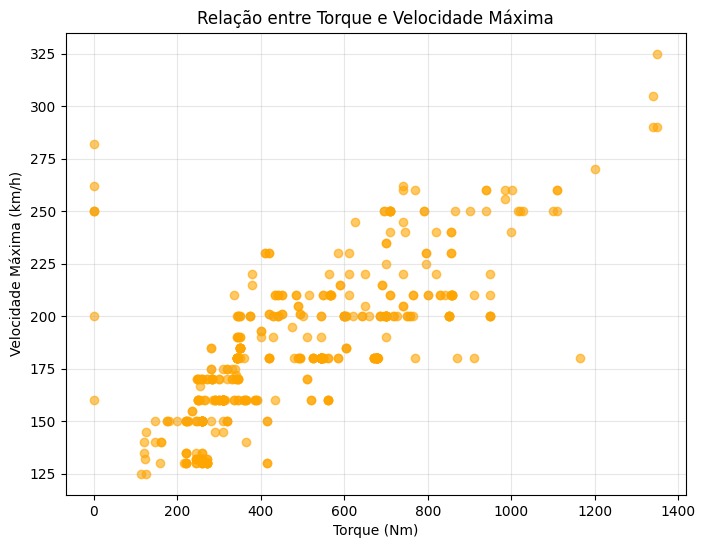

Correlação entre torque e velocidade máxima: 0.72


In [11]:
# Os carros de maior torque também são os mais rápidos?
plt.figure(figsize=(8,6))
plt.scatter(dados['torque_nm'], dados['top_speed_kmh'], alpha=0.6, color='orange')
plt.xlabel('Torque (Nm)')
plt.ylabel('Velocidade Máxima (km/h)')
plt.title('Relação entre Torque e Velocidade Máxima')
plt.grid(alpha=0.3)
plt.show()

correlacao = dados['torque_nm'].corr(dados['top_speed_kmh'])
print(f"Correlação entre torque e velocidade máxima: {correlacao:.2f}")

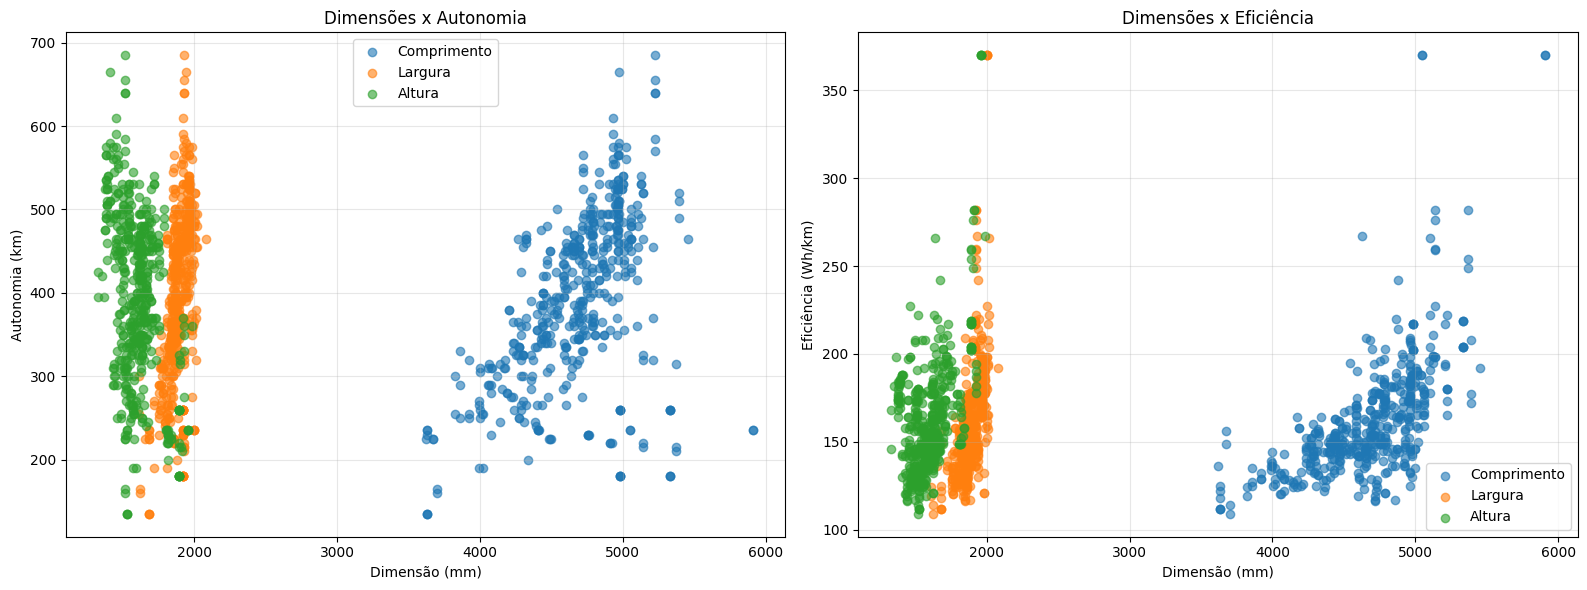

Correlação entre comprimento e autonomia: 0.50
Correlação entre largura e autonomia: 0.52
Correlação entre altura e autonomia: -0.42
Correlação entre comprimento e eficiência: 0.64
Correlação entre largura e eficiência: 0.57
Correlação entre altura e eficiência: 0.51


In [12]:
# Existe alguma relação entre o tamanho do carro (length_mm, width_mm, height_mm) e sua autonomia ou eficiência?
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Tamanho x Autonomia
axes[0].scatter(dados['length_mm'], dados['range_km'], alpha=0.6, label='Comprimento')
axes[0].scatter(dados['width_mm'], dados['range_km'], alpha=0.6, label='Largura')
axes[0].scatter(dados['height_mm'], dados['range_km'], alpha=0.6, label='Altura')
axes[0].set_xlabel('Dimensão (mm)')
axes[0].set_ylabel('Autonomia (km)')
axes[0].set_title('Dimensões x Autonomia')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Tamanho x Eficiência
axes[1].scatter(dados['length_mm'], dados['efficiency_wh_per_km'], alpha=0.6, label='Comprimento')
axes[1].scatter(dados['width_mm'], dados['efficiency_wh_per_km'], alpha=0.6, label='Largura')
axes[1].scatter(dados['height_mm'], dados['efficiency_wh_per_km'], alpha=0.6, label='Altura')
axes[1].set_xlabel('Dimensão (mm)')
axes[1].set_ylabel('Eficiência (Wh/km)')
axes[1].set_title('Dimensões x Eficiência')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Correlações
corr_length_range = dados['length_mm'].corr(dados['range_km'])
corr_width_range = dados['width_mm'].corr(dados['range_km'])
corr_height_range = dados['height_mm'].corr(dados['range_km'])

corr_length_eff = dados['length_mm'].corr(dados['efficiency_wh_per_km'])
corr_width_eff = dados['width_mm'].corr(dados['efficiency_wh_per_km'])
corr_height_eff = dados['height_mm'].corr(dados['efficiency_wh_per_km'])

print("Correlação entre comprimento e autonomia:", f"{corr_length_range:.2f}")
print("Correlação entre largura e autonomia:", f"{corr_width_range:.2f}")
print("Correlação entre altura e autonomia:", f"{corr_height_range:.2f}")
print("Correlação entre comprimento e eficiência:", f"{corr_length_eff:.2f}")
print("Correlação entre largura e eficiência:", f"{corr_width_eff:.2f}")
print("Correlação entre altura e eficiência:", f"{corr_height_eff:.2f}")

# Perguntas para Visualização Comparativa


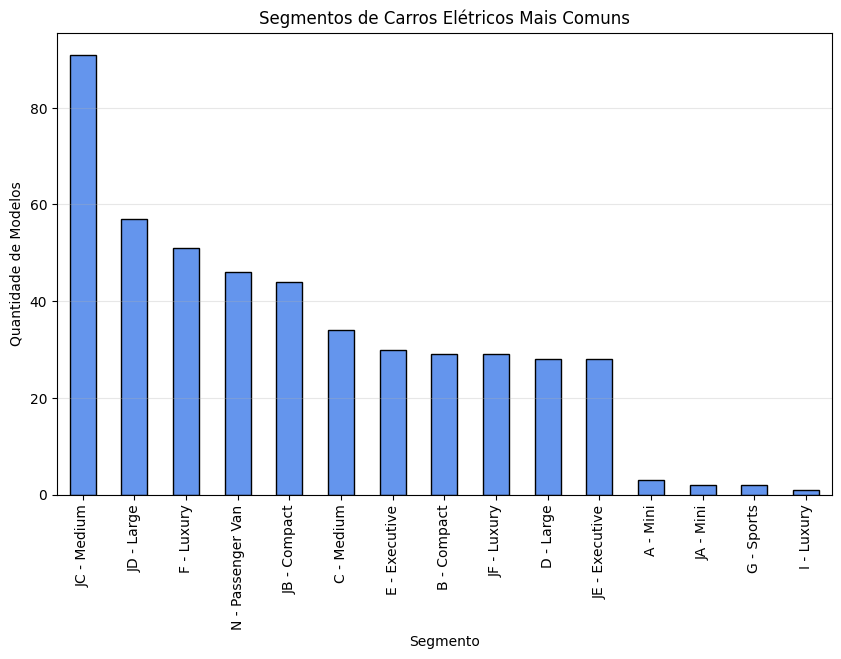

In [13]:
# Quais segmentos (segment) de carros dominam o mercado elétrico atual?

# Contar a quantidade de modelos por segmento
segmentos_mais_comuns = dados['segment'].value_counts()

# Visualização
plt.figure(figsize=(10,6))
segmentos_mais_comuns.plot(kind='bar', color='cornflowerblue', edgecolor='black')
plt.title('Segmentos de Carros Elétricos Mais Comuns')
plt.xlabel('Segmento')
plt.ylabel('Quantidade de Modelos')
plt.grid(axis='y', alpha=0.3)
plt.show()

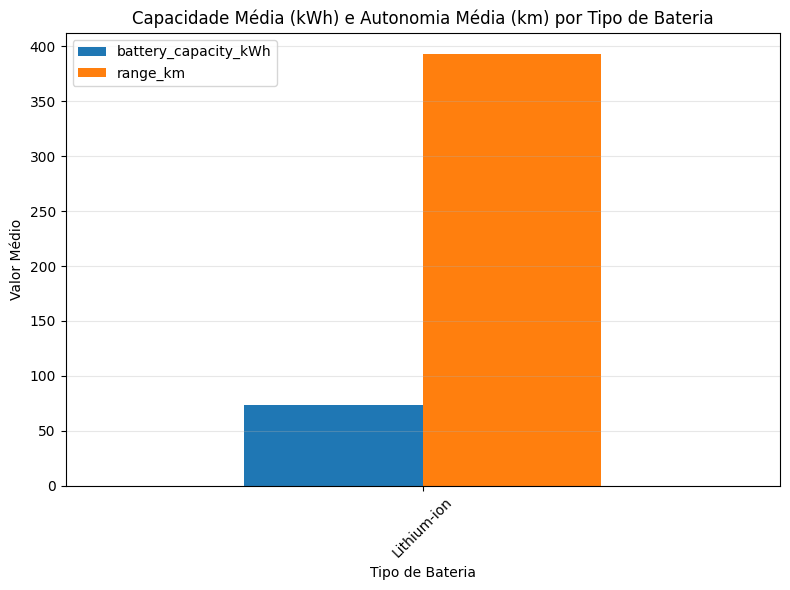

In [14]:
# Qual é a relação entre tipo de bateria e capacidade/autonomia?

# Agrupar por tipo de bateria e calcular médias de capacidade e autonomia
bateria_stats = dados.groupby('battery_type')[['battery_capacity_kWh', 'range_km']].mean().sort_values('battery_capacity_kWh', ascending=False)

# Visualização
fig, ax1 = plt.subplots(figsize=(8,6))
bateria_stats[['battery_capacity_kWh', 'range_km']].plot(kind='bar', ax=ax1)
plt.title('Capacidade Média (kWh) e Autonomia Média (km) por Tipo de Bateria')
plt.ylabel('Valor Médio')
plt.xlabel('Tipo de Bateria')
plt.grid(axis='y', alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [15]:
# Qual o top 10 modelos com maior autonomia no mercado?
top_10_autonomia = dados.sort_values('range_km', ascending=False).head(10)
print(top_10_autonomia[['brand', 'model', 'range_km']])

             brand                            model  range_km
237  Mercedes-Benz                         EQS 450+       685
193          Lucid                Air Grand Touring       665
236  Mercedes-Benz                   EQS 450 4MATIC       655
239  Mercedes-Benz                   EQS 580 4MATIC       640
238  Mercedes-Benz                   EQS 500 4MATIC       640
14            Audi  A6 Sportback e-tron performance       610
15            Audi      A6 Sportback e-tron quattro       590
240  Mercedes-Benz               EQS AMG 53 4MATIC+       585
195          Lucid                      Air Touring       580
339        Porsche                      Taycan Plus       575


In [16]:
# Quantos veículos suportam carregamento rápido (fast_charging_power_kw_dc > X)?
X = 200  # exemplo

num_veiculos_rapido = dados[dados['fast_charging_power_kw_dc'] > X].shape[0]
print(f"Número de veículos com carregamento rápido acima de {X} kW: {num_veiculos_rapido}")

Número de veículos com carregamento rápido acima de 200 kW: 48


In [17]:
# Distribuição do número de assentos: existem muitos veículos elétricos de 7 lugares?

num_veiculos_7_lugares = dados[dados['seats'] == 7].shape[0]
print(f"Número de veículos com 7 lugares: {num_veiculos_7_lugares}")

dados['seats'].value_counts()

Número de veículos com 7 lugares: 36


seats
5    382
7     36
4     27
9     15
8      7
6      5
2      3
Name: count, dtype: int64

# Perguntas para Modelagem Preditiva

- É possível prever a autonomia (range_km) de um carro com base em suas especificações técnicas?
- Dado o tamanho, peso e bateria, qual seria o tipo mais provável de carroceria (SUV, Sedan, etc.)?
- Como prever a aceleração de um carro com base em torque, peso e tração?


# Perguntas para insights de mercado e storytelling

- Quais marcas estão focando mais em performance (alta velocidade e aceleração)?
- Qual o perfil do carro elétrico “ideal” em 2025? (em termos de alcance, velocidade, tamanho)
- Que tipo de carro domina o segmento urbano? E o interurbano?
- Há uma tendência de carros mais rápidos, maiores ou mais econômicos?
- Existe um trade-off claro entre performance e eficiência energética?
